# k-Means Implementation

We first import two useful libraries
1. numpy (matrix algebra):  we use np as a shortcut
2. plyplot from matplotlib: useful for plotting charts: we use plt as a shortcut
3. use tab and shift+tab for help

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
# first we create a few centroids and some random points around them
np.random.seed(3)
centroid_count = 3
sigma = 0.07
n = 10

# initialise centroids randomly
#centroid_array = 0.6 * np.random.rand(centroid_count,2) + 0.15
# initialise centroids manually
centroid_array = np.array([[0.2, 0.8], [0.4, 0.25], [0.8, 0.62]])
print(centroid_array)

# create "emtpy" array having a valid structure
points = np.empty((0,2),float)
for centr in centroid_array:    
    points = np.vstack((points,sigma * np.random.randn(n,2) + centr))

print("%d points generated" % (len(points)))
#points = sigma * np.random.randn(n,2) + centroid_array[0,:]
#points = sigma * np.random.randn(n,2) + centroid_array[0,:]

#x= sigma*np.random.randn(10)+centroid[0]
#y= sigma*np.random.randn(10)+centroid[1]
#print(x)
#print(y)


[[ 0.2   0.8 ]
 [ 0.4   0.25]
 [ 0.8   0.62]]
30 points generated


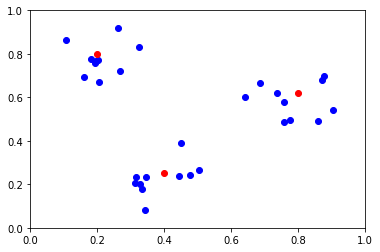

In [155]:
# plot clusters
plt.figure()
plt.plot(points[:,0],points[:,1],"bo")
plt.plot(centroid_array[:,0],centroid_array[:,1], 'ro')
plt.axis([0, 1.0, 0, 1.0])
plt.show()
plt.close()

In [167]:
# cluster size
k = 3
max_iterations = 100
threshold = 0.001
# create k random centroids
np.random.seed(15)
estimated_centroids = np.random.rand(k, 2)

# measure each points distance to each centroid, and for each point select the centroid that is closest
def eucDist(a, b):    
    return np.sqrt(np.sum((a - b) ** 2, axis=1))   

# allocate cluster array
est_clusters = np.zeros((len(points), ), dtype=np.int)
# initialise preceding centroids
preceding_centroids = np.zeros(np.shape(estimated_centroids))
iteration = 0
while (np.mean(estimated_centroids - preceding_centroids) > threshold and (iteration < max_iterations)):
    preceding_centroids = estimated_centroids.copy()
    for idx in range(0,len(points)):
        # measure distance between each point and estimated centroid and select centroid having min distance
        est_clusters[idx] = np.argmin((eucDist(points[idx,:], estimated_centroids)))    
    # calculate new centroids based on mean point in each estimated cluster at iterations iter
    for idx in range(0, k):
        cluster_pts = points[np.nonzero(est_clusters == idx)]        
        if (len(cluster_pts) > 1):
            # update centroids
            estimated_centroids[idx] = np.sum(cluster_pts, axis= 0)/len(cluster_pts)
    iteration += 1 

print(estimated_centroids)
#np.reshape(est_clusters,(-1,1)))
print(est_clusters)
print("Iterations until convergence: %d" %(iteration) )


[[ 0.78707462  0.58608793]
 [ 0.38621755  0.22691645]
 [ 0.21074971  0.77659209]]
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Iterations until convergence: 3


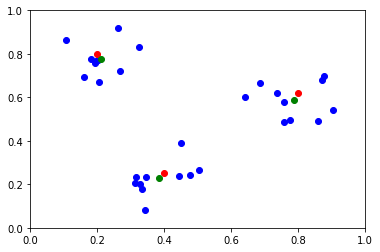

In [157]:
plt.plot(points[:,0],points[:,1], "bo")
plt.plot(centroid_array[:,0], centroid_array[:,1], 'ro')
plt.plot(estimated_centroids[:,0], estimated_centroids[:,1], 'go')
plt.axis([0, 1.0, 0, 1.0])
plt.show()
plt.close()